<a href="https://colab.research.google.com/github/Acharya-Keerthana/Education/blob/main/minor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:Given the dataset(Titanic Data set)link which contains a data of around 900 rows, analyse the factors influenced survival and develop a model that can classify survival for unseen passenger**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
dt=pd.read_csv('/content/titanic3.csv')
dt.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
for col in dt.columns:
  print(col)

pclass
survived
name
sex
age
sibsp
parch
ticket
fare
cabin
embarked
boat
body
home.dest


In [ ]:
dt.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


<Axes: xlabel='sex', ylabel='count'>

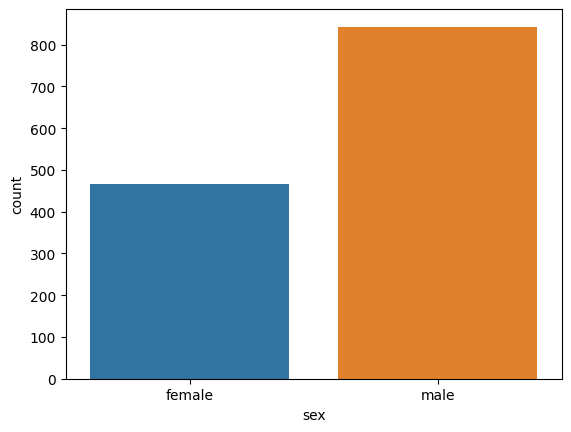

In [ ]:
sns.countplot(x='sex',data=dt)

<Axes: xlabel='embarked', ylabel='count'>

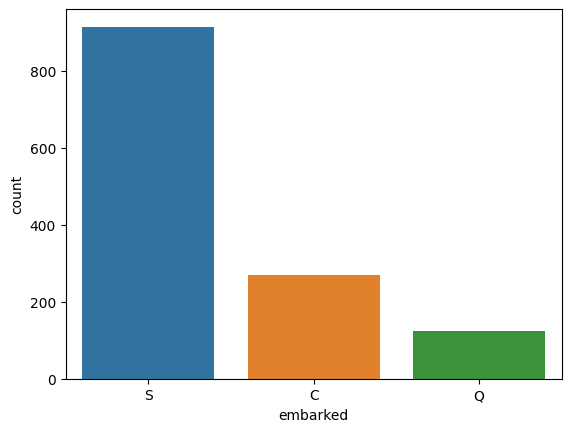

In [ ]:
sns.countplot(x='embarked',data=dt)

<Axes: ylabel='age'>

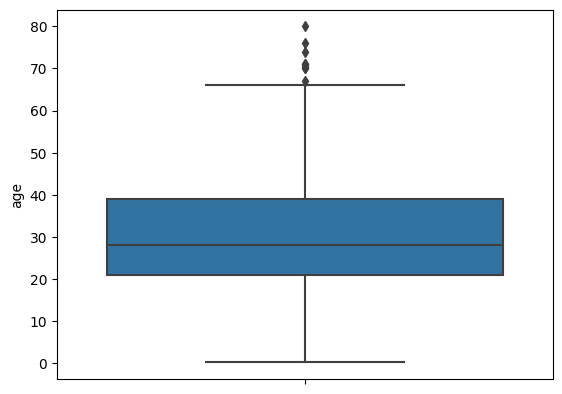

In [ ]:
sns.boxplot(y='age',data=dt)

<Axes: xlabel='fare', ylabel='Count'>

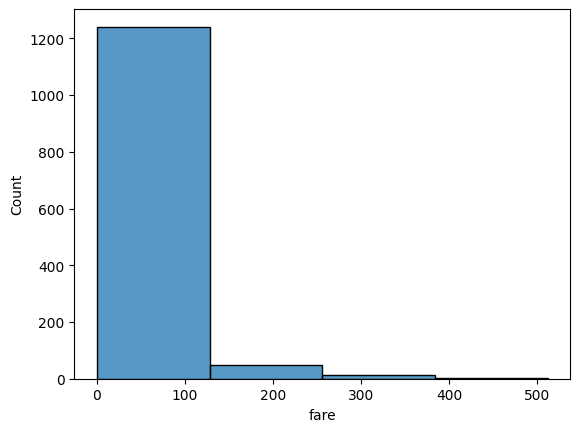

In [ ]:
sns.histplot(dt['fare'],bins=4)

<Axes: xlabel='sibsp', ylabel='count'>

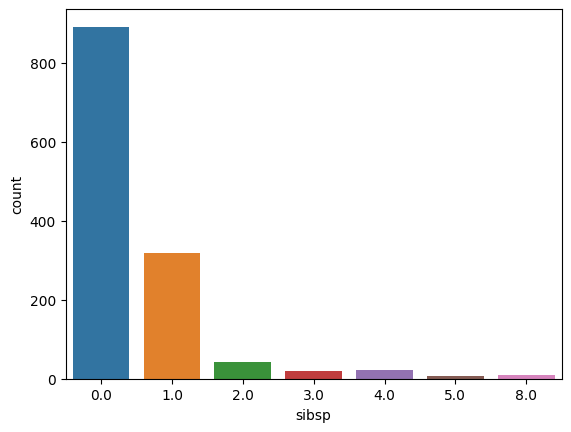

In [ ]:
sns.countplot(x='sibsp',data=dt)

Text(0, 0.5, 'fare')

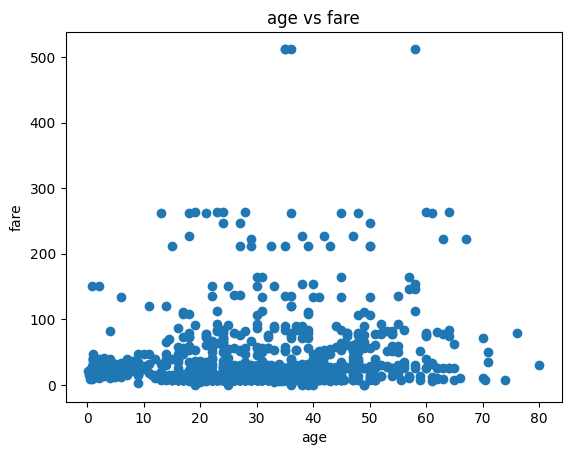

In [ ]:
#bivaraite
plt.scatter(dt['age'],dt['fare'])
plt.title('age vs fare')
plt.xlabel('age')
plt.ylabel('fare')

sex     survived
female  0.0         127
        1.0         339
male    0.0         682
        1.0         161
dtype: int64

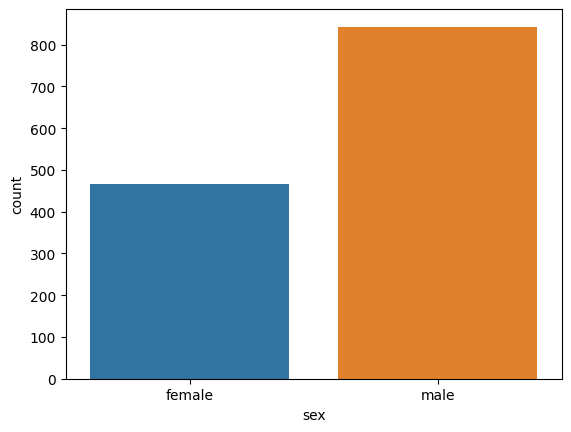

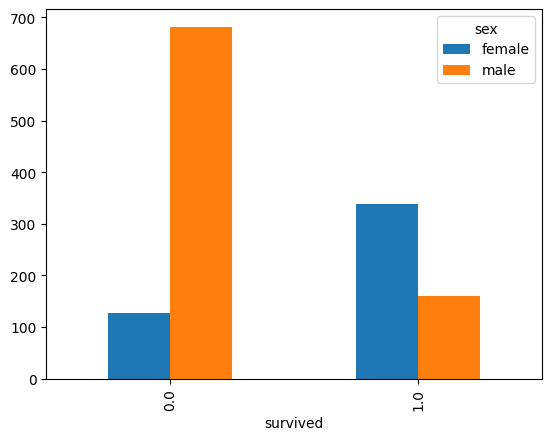

In [ ]:
sns.countplot(x='sex',data=dt)
pd.crosstab(dt['survived'],dt['sex']).plot(kind='bar')
counts=dt.groupby(['sex','survived'],axis=0)
counts.size()

array([<Axes: title={'center': '0.0'}>, <Axes: title={'center': '1.0'}>],
      dtype=object)

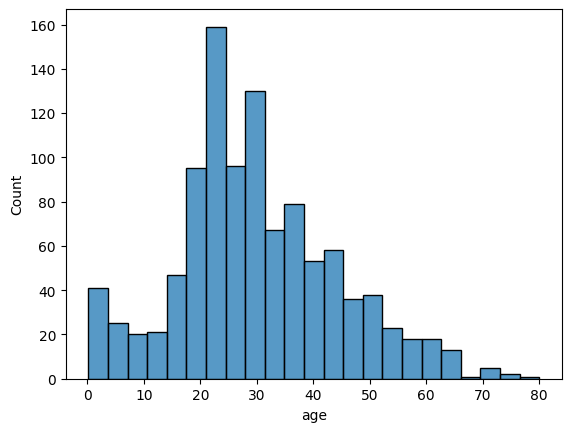

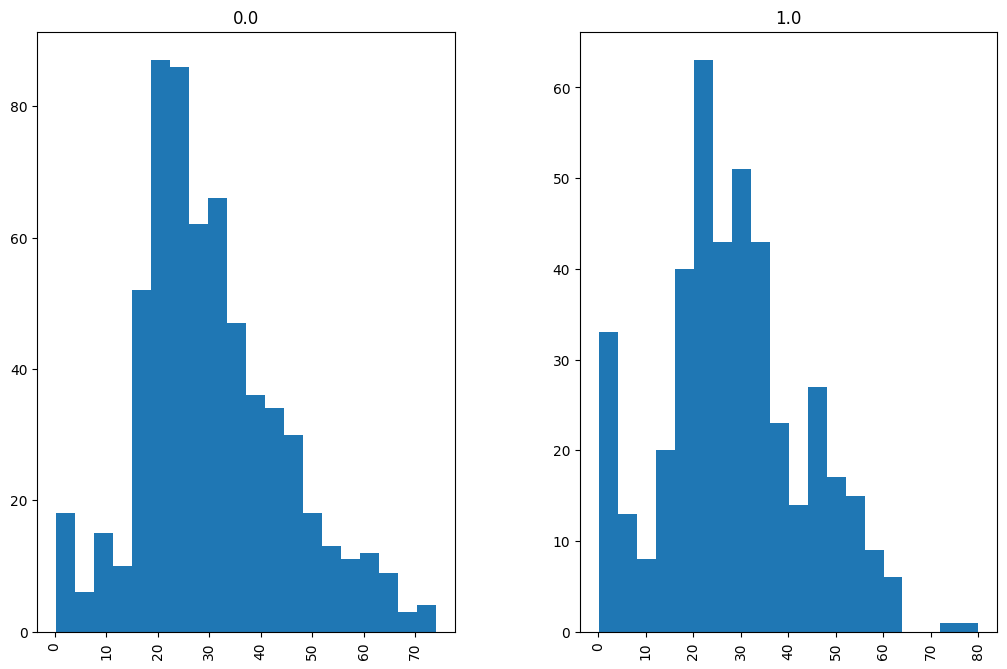

In [ ]:
sns.histplot(x='age',data=dt)
dt.hist(by='survived',column='age',bins=20,figsize=(12,8))


sibsp  survived
0.0    0.0         582
       1.0         309
1.0    0.0         156
       1.0         163
2.0    0.0          23
       1.0          19
3.0    0.0          14
       1.0           6
4.0    0.0          19
       1.0           3
5.0    0.0           6
8.0    0.0           9
dtype: int64

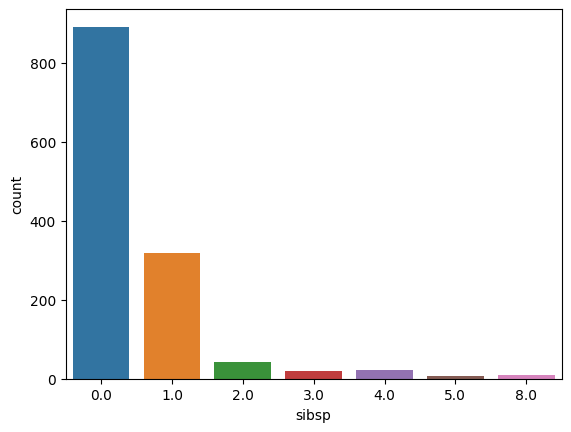

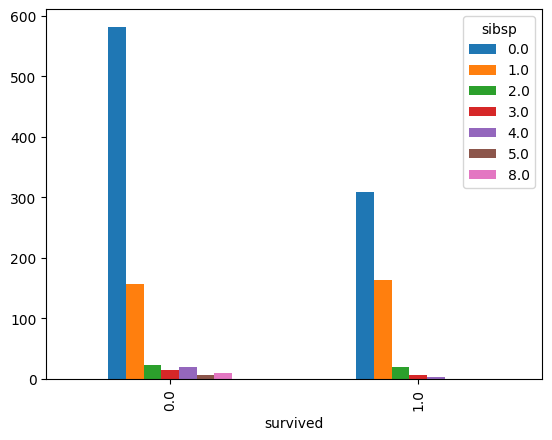

In [ ]:
sns.countplot(x='sibsp',data=dt)
pd.crosstab(dt['survived'],dt['sibsp']).plot(kind='bar')
counts=dt.groupby(['sibsp','survived'],axis=0)
counts.size()

pclass  survived
1.0     0.0         123
        1.0         200
2.0     0.0         158
        1.0         119
3.0     0.0         528
        1.0         181
dtype: int64

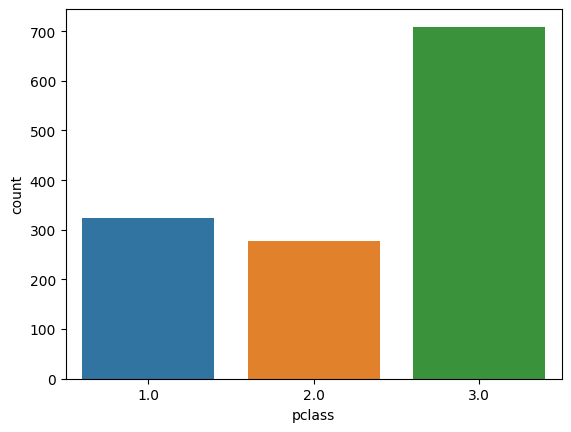

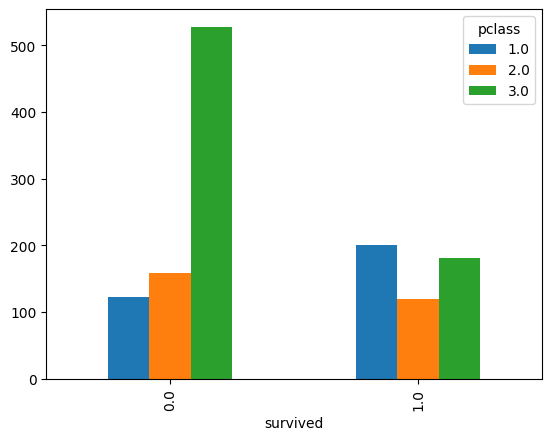

In [ ]:
sns.countplot(x='pclass',data=dt)
pd.crosstab(dt['survived'],dt['pclass']).plot(kind='bar')
counts=dt.groupby(['pclass','survived'],axis=0)
counts.size()

parch  survived
0.0    0.0         666
       1.0         336
1.0    0.0          70
       1.0         100
2.0    0.0          56
       1.0          57
3.0    0.0           3
       1.0           5
4.0    0.0           5
       1.0           1
5.0    0.0           5
       1.0           1
6.0    0.0           2
9.0    0.0           2
dtype: int64

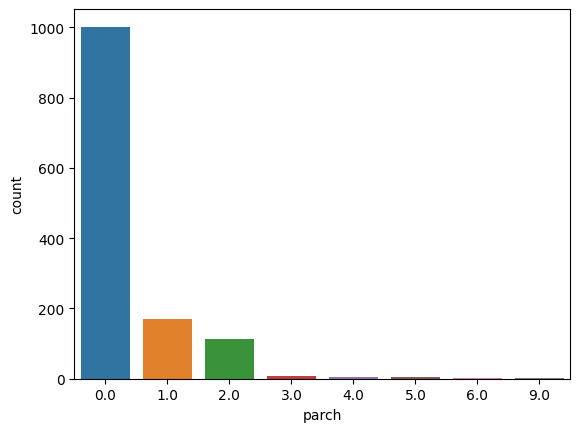

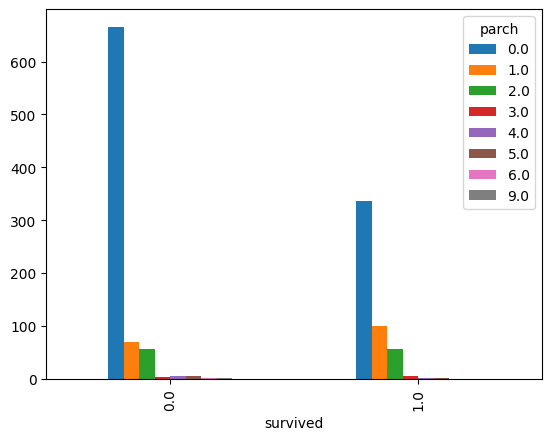

In [ ]:
sns.countplot(x='parch',data=dt)
pd.crosstab(dt['survived'],dt['parch']).plot(kind='bar')
counts=dt.groupby(['parch','survived'],axis=0)
counts.size()

In [ ]:
dt.head(10).isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,True,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [ ]:
dt.isnull().values.any()

True

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [ ]:
dt1=dt.drop(['name','ticket','cabin','boat','body','home.dest'],axis=1)


In [ ]:
dt1.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S
5,1.0,1.0,male,48.0000,0.0,0.0,26.5500,S
6,1.0,1.0,female,63.0000,1.0,0.0,77.9583,S
7,1.0,0.0,male,39.0000,0.0,0.0,0.0000,S
8,1.0,1.0,female,53.0000,2.0,0.0,51.4792,S
9,1.0,0.0,male,71.0000,0.0,0.0,49.5042,C


In [ ]:
dt1.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64

In [ ]:
dt1['age']=dt1['age'].fillna(value=dt1['age'].mean())

In [ ]:
dt1.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        2
embarked    3
dtype: int64

In [ ]:
dt1['fare']=dt1['fare'].fillna(value=dt1['fare'].mean())

In [ ]:
dt1.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        0
embarked    3
dtype: int64

In [ ]:
dt1.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1310.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,12.878277,1.041658,0.865560,51.719113
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
dt1.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        0
embarked    3
dtype: int64

In [ ]:
dt1['embarked'].fillna('s',inplace=True)

In [ ]:
dt1.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
fare        0
embarked    0
dtype: int64

In [ ]:
dt1[['survived','sibsp']]=dt1[['survived','sibsp']].fillna(value=dt1[['survived','sibsp']].mean())

In [ ]:
dt1.isnull().sum()

pclass      1
survived    0
sex         1
age         0
sibsp       0
parch       1
fare        0
embarked    0
dtype: int64

In [ ]:
dt['sex'].describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

In [ ]:
dt1['sex'].fillna('male',inplace=True)

In [ ]:
dt1.isnull().sum()

pclass      1
survived    0
sex         0
age         0
sibsp       0
parch       1
fare        0
embarked    0
dtype: int64

In [ ]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1310 non-null   float64
 2   sex       1310 non-null   object 
 3   age       1310 non-null   float64
 4   sibsp     1310 non-null   float64
 5   parch     1309 non-null   float64
 6   fare      1310 non-null   float64
 7   embarked  1310 non-null   object 
dtypes: float64(6), object(2)
memory usage: 82.0+ KB


In [ ]:
dt1[['parch','pclass']]=dt1[['parch','pclass']].fillna(value=dt1[['parch','pclass']].mean())

In [ ]:
dt1.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
obj=dt1.dtypes==np.object
print(obj)

pclass      False
survived    False
sex          True
age         False
sibsp       False
parch       False
fare        False
embarked     True
dtype: bool


<ipython-input-39-71149192d676>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj=dt1.dtypes==np.object


In [ ]:
dt2=pd.get_dummies(dt1,drop_first=True)

In [ ]:
obj=dt2.dtypes==np.object
print(obj)

pclass        False
survived      False
age           False
sibsp         False
parch         False
fare          False
sex_male      False
embarked_Q    False
embarked_S    False
embarked_s    False
dtype: bool


<ipython-input-41-b0be84bd1a17>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  obj=dt2.dtypes==np.object


In [ ]:
dt2.head(10)

,pclass,survived,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,embarked_s
0,1.0,1.0,29.0000,0.0,0.0,211.3375,0,0,1,0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,1,0,1,0
2,1.0,0.0,2.0000,1.0,2.0,151.5500,0,0,1,0
3,1.0,0.0,30.0000,1.0,2.0,151.5500,1,0,1,0
4,1.0,0.0,25.0000,1.0,2.0,151.5500,0,0,1,0
5,1.0,1.0,48.0000,0.0,0.0,26.5500,1,0,1,0
6,1.0,1.0,63.0000,1.0,0.0,77.9583,0,0,1,0
7,1.0,0.0,39.0000,0.0,0.0,0.0000,1,0,1,0
8,1.0,1.0,53.0000,2.0,0.0,51.4792,0,0,1,0
9,1.0,0.0,71.0000,0.0,0.0,49.5042,1,0,0,0


In [ ]:
flo=dt2.dtypes==np.float
print(flo)

pclass         True
survived       True
age            True
sibsp          True
parch          True
fare           True
sex_male      False
embarked_Q    False
embarked_S    False
embarked_s    False
dtype: bool


<ipython-input-43-3daecdaa37c1>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  flo=dt2.dtypes==np.float


In [ ]:
from sklearn.model_selection import train_test_split
predictors=dt2.drop(['survived'],axis=1)
target=dt1['survived']
x_train,x_test,y_train,y_test=train_test_split(predictors,target,test_size=0.3,random_state=0)


In [ ]:
print(len(x_test))


393


In [ ]:
print(len(y_test))
print(y_test)

393
1139    0.0
533     1.0
459     0.0
1150    0.0
393     0.0
       ... 
914     0.0
580     1.0
1080    1.0
1250    0.0
88      1.0
Name: survived, Length: 393, dtype: float64


In [ ]:
print(len(y_train))
print(y_train)

917
501     1.0
588     1.0
402     1.0
1193    0.0
686     1.0
       ... 
763     1.0
835     0.0
1216    1.0
559     1.0
684     0.0
Name: survived, Length: 917, dtype: float64


In [ ]:
print(len(x_train))


917


In [ ]:
y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict (x_test)
acc_logreg = round(accuracy_score(y_pred,y_test),2)*100
print('accuracy :',acc_logreg)

accuracy : 80.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(n_estimators=15,max_depth=None,random_state=0)
randomforest.fit(x_train,y_train)
acc_randomforest=round(accuracy_score(y_pred,y_test), 2)*100
print('accuracy:',acc_randomforest)


accuracy: 80.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_knn = round(accuracy_score(y_pred,y_test), 2)*100
print('accuracy :',acc_knn)

accuracy : 70.0
